In [ ]:
import pandas as pd
df = pd.read_excel('/content/DatosModeloElizabeta.xlsx')

In [ ]:
print(df.dtypes)

Nombre del archivo                 object
ID                                 object
NER_personas                       object
NER-Organizaciones                 object
NER Fechas                         object
Hechos                             object
Pretensiones                       object
Consideraciones 1                  object
Consideraciones 2                  object
Consideraciones 3                  object
Consideraciones 4                  object
Sección resuelve                   object
Trigramas_texto                    object
Trigramas_relevantes               object
Etiqueta                            int64
Hechos_tokens                      object
Pretensiones_tokens                object
Hechos_word_count                   int64
Pretensiones_word_count             int64
Hechos_top_words                   object
Pretensiones_top_words             object
Hechos_top_entities                object
Pretensiones_top_entities          object
Hechos_pos_tags                   

In [ ]:
!pip install transformers==4.28.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.1 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

In [ ]:
# Cargar el modelo y el tokenizer preentrenados
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
model = AutoModel.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")

# Función para obtener embeddings
def obtener_embeddings(texto):
  tokens = tokenizer(texto, return_tensors="pt", truncation=True, padding=True)
  with torch.no_grad():
    outputs = model(**tokens)
  embeddings = outputs.last_hidden_state.mean(dim=1).numpy()
  return embeddings

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/310 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/486k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Aplicar la función a la columna "Hechos"
df['embeddings'] = df['Hechos'].apply(obtener_embeddings)

In [ ]:
import numpy as np
texto_ejemplo = df['Hechos'].iloc[0]
embeddings_ejemplo = obtener_embeddings(texto_ejemplo)
print(type(embeddings_ejemplo))

<class 'numpy.ndarray'>


In [ ]:
print(df)

                                    Nombre del archivo        ID  \
0               -1_2020-800-00217_2022-01-252219-1.pdf    1 sent   
1    115557 SEI KOU S.A. VS. ÁLVARO ESLAVA JÁCOME y...    2 sent   
2    1283_JOSE_LUIS_MALVEHY_y_OTROS_VS._SERVISATELI...    3 sent   
3    134677 GUSTAVO FERNANDO MUÑOZ PEDRAZA Y OTRO V...    4 sent   
4    1933_CARLOS_HAKIM_vs_JORGE_HAKIM_Y_OTROS_10_10...    5 sent   
..                                                 ...       ...   
159   Sentencia n.° 801-76  30 de octubre del 2014.pdf  161 sent   
160  Sentencia n.° 801-76  30 de octubre del 2014.p...  162 sent   
161  Sentencia n.° 801-82 de 20 de noviembre del 20...  163 sent   
162  Sentencia n.º 800-83 de 03 de diciembre del 20...  164 sent   
163  Sentencia nº. 800-116 de 4 de septiembre del 2...  165 sent   

                                          NER_personas  \
0    ['joaquín fernando vélez', 'joaquín fernando v...   
1    ['carlos darío camargo la hoz', 'luis fernando...   
2    ['se

In [ ]:
import numpy as np

# Encuentra la longitud del vector más largo
longitud_maxima = max(df['embeddings'].apply(len))

# Aplica padding a los vectores
df['embeddings_padded'] = df['embeddings'].apply(lambda x: np.pad(x, (0, longitud_maxima - len(x)), 'constant'))

Modelo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Dividir datos en features (X) y etiquetas (y)
X = np.stack(df['embeddings_padded'].values).reshape(len(df), -1)  # Reshape to 2D
y = df['Etiqueta']

In [ ]:
# Dividir datos en entrenamiento, validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)


In [ ]:
# Definir parámetros para GridSearchCV
param_grid = {
    'n_estimators': [40, 80, 200],
    'max_depth': [2, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini']
}


In [ ]:
# Inicializar el RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X, y)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [40, 80, 200]},
             scoring='accuracy')

In [ ]:
# Obtener el mejor modelo
best_rf = grid_search.best_estimator_
print(f"Mejor modelo encontrado:\n{best_rf}")

Mejor modelo encontrado:
RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=80,
                       random_state=42)


In [ ]:
# Reshape X_val to 2 dimensions
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)

# Evaluar el modelo en datos de validación (using reshaped X_val)
y_pred_val = best_rf.predict(X_val_reshaped)
print("\nReporte de clasificación en datos de validación:")
print(classification_report(y_val, y_pred_val))


Reporte de clasificación en datos de validación:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.95      0.95      0.95        19

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [ ]:
# Predecir en entrenamiento y validación
y_pred_train = best_rf.predict(X_train.reshape(X_train.shape[0], -1)) # Reshape X_train to 2D
y_pred_val = best_rf.predict(X_val.reshape(X_val.shape[0], -1)) # Reshape X_val to 2D

# Calcular métricas para entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train, output_dict=True)

# Calcular métricas para validación
acc_val = accuracy_score(y_val, y_pred_val)
report_val = classification_report(y_val, y_pred_val, output_dict=True)


In [ ]:
# Imprimir resultados
print("Métricas de entrenamiento:")
print(f"Accuracy: {acc_train}")
print(report_train)

print("\nMétricas de validación:")
print(f"Accuracy: {acc_val}")
print(report_val)

Métricas de entrenamiento:
Accuracy: 0.9010989010989011
{'0': {'precision': 0.9333333333333333, 'recall': 0.875, 'f1-score': 0.9032258064516129, 'support': 48}, '1': {'precision': 0.8695652173913043, 'recall': 0.9302325581395349, 'f1-score': 0.898876404494382, 'support': 43}, 'accuracy': 0.9010989010989011, 'macro avg': {'precision': 0.9014492753623189, 'recall': 0.9026162790697674, 'f1-score': 0.9010511054729975, 'support': 91}, 'weighted avg': {'precision': 0.9032011466794074, 'recall': 0.9010989010989011, 'f1-score': 0.9011705945377565, 'support': 91}}

Métricas de validación:
Accuracy: 0.95
{'0': {'precision': 0.9523809523809523, 'recall': 0.9523809523809523, 'f1-score': 0.9523809523809523, 'support': 21}, '1': {'precision': 0.9473684210526315, 'recall': 0.9473684210526315, 'f1-score': 0.9473684210526315, 'support': 19}, 'accuracy': 0.95, 'macro avg': {'precision': 0.949874686716792, 'recall': 0.949874686716792, 'f1-score': 0.949874686716792, 'support': 40}, 'weighted avg': {'preci

In [ ]:
# Crear tabla comparativa
metrics_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision (macro)', 'Recall (macro)', 'F1-score (macro)'],
    'Entrenamiento': [acc_train,
                       report_train['macro avg']['precision'],
                       report_train['macro avg']['recall'],
                       report_train['macro avg']['f1-score']],
    'Validación': [acc_val,
                     report_val['macro avg']['precision'],
                     report_val['macro avg']['recall'],
                     report_val['macro avg']['f1-score']]
})

# Mostrar tabla
display(metrics_df)

,Métrica,Entrenamiento,Validación
0,Accuracy,0.901099,0.950000
1,Precision (macro),0.901449,0.949875
2,Recall (macro),0.902616,0.949875
3,F1-score (macro),0.901051,0.949875


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Datos para las gráficas
metrics = ['Accuracy', 'Precision (macro)', 'Recall (macro)', 'F1-score (macro)']
train_values = [acc_train,
                report_train['macro avg']['precision'],
                report_train['macro avg']['recall'],
                report_train['macro avg']['f1-score']]
val_values = [acc_val,
              report_val['macro avg']['precision'],
              report_val['macro avg']['recall'],
              report_val['macro avg']['f1-score']]

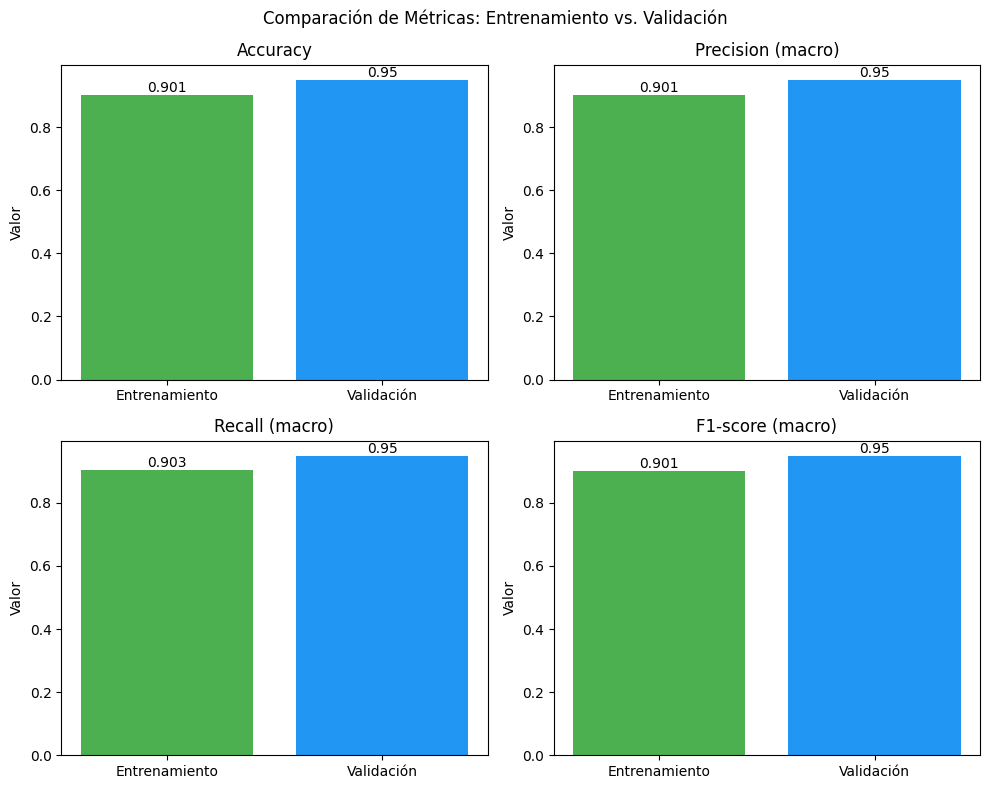

In [ ]:
# Crear gráficas
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Comparación de Métricas: Entrenamiento vs. Validación')

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    bars = ax.bar(['Entrenamiento', 'Validación'], [train_values[i], val_values[i]], color=['#4CAF50', '#2196F3']) # Verde y azul
    ax.set_title(metric)
    ax.set_ylabel('Valor')

    # Etiquetas encima de las barras
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
!pip install --upgrade scikit-learn  # Upgrade scikit-learn to the latest version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 24.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

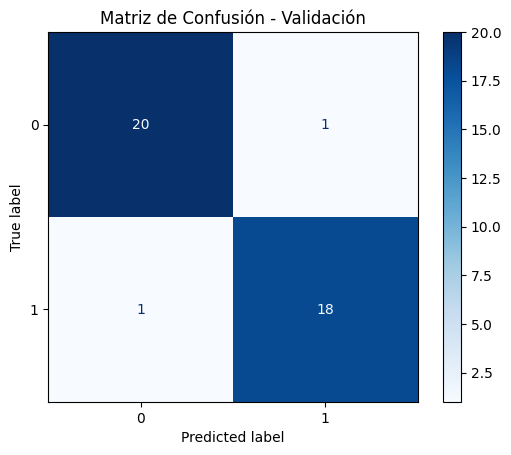

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Import ConfusionMatrixDisplay

# Matriz de confusión para validación
cm_val = confusion_matrix(y_val, y_pred_val)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=best_rf.classes_) # Use ConfusionMatrixDisplay instead of ConfusionDisplay
disp_val.plot(cmap='Blues')
plt.title('Matriz de Confusión - Validación')
plt.show()

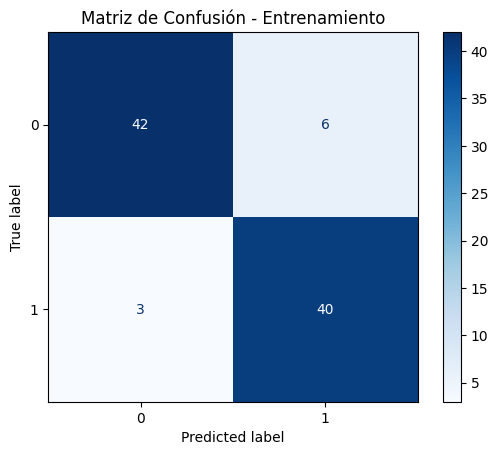

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Import ConfusionMatrixDisplay

# Matriz de confusión para entrenamiento
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=best_rf.classes_) # Use ConfusionMatrixDisplay instead of ConfusionDisplay
disp_train.plot(cmap='Blues')
plt.title('Matriz de Confusión - Entrenamiento')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Reshape X_train to be 2D
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Now pass the reshaped data to predict_proba
y_pred_train_proba = best_rf.predict_proba(X_train_reshaped)[:, 0]

# Similarly, reshape X_val if you're using it later
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)
y_pred_val_proba = best_rf.predict_proba(X_val_reshaped)[:, 0]

In [ ]:

# Calcular curva ROC
fpr_train, tpr_train, _ = roc_curve(y_train_bin, y_pred_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, _ = roc_curve(y_val_bin, y_pred_val_proba)
roc_auc_val = auc(fpr_val, tpr_val)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

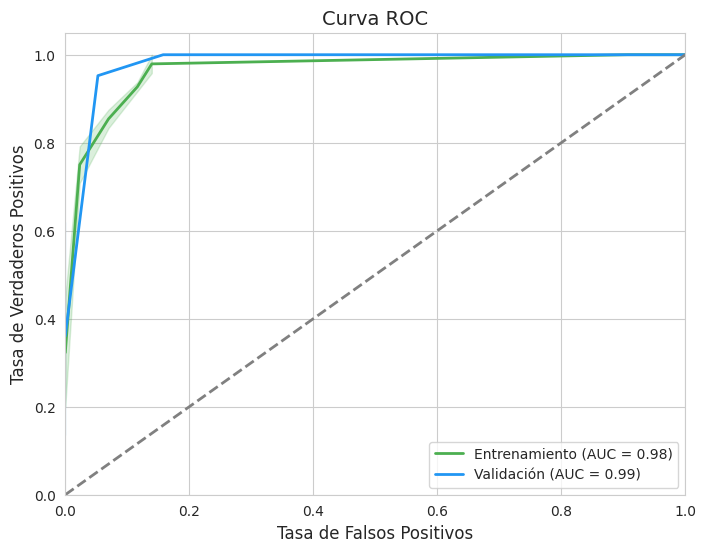

In [ ]:
# Graficar curva ROC con seaborn
sns.set_style("whitegrid")  # Establecer estilo de seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr_train, y=tpr_train, color='#4CAF50', lw=2, label='Entrenamiento (AUC = %0.2f)' % roc_auc_train)
sns.lineplot(x=fpr_val, y=tpr_val, color='#2196F3', lw=2, label='Validación (AUC = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.title('Curva ROC', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.show()

Pruebas

In [ ]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import torch # Import the torch module

In [ ]:
!pip install transformers
# Cargar el modelo BERT en español
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')
model = BertModel.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expec

In [ ]:
def obtener_embeddings(texto):
    # Tokenizar el texto
    tokens = tokenizer(texto, return_tensors='pt', truncation=True, padding=True)

    # Obtener los embeddings
    with torch.no_grad():
        outputs = model(**tokens)
        embeddings = outputs.last_hidden_state.mean(dim=1).numpy()

    return embeddings

Prueba 1

In [ ]:
# Texto de prueba
texto_prueba1 = "El señor Carlos Hernán Malvehy, en calidad de apoderado especial de S3 Wireless, Phillip Stephenson, María Stephenson y John Stephenson, se entrevistó con Gina Achury de Servisatélite S.A. para entregarle acciones endosadas a favor de Servisatélite S.A. por el pago de $150,000 dólares, pero Servisatélite se negó a recibirlas.  Debido a la negativa de Servisatélite de recibir las acciones, Carlos Hernán Malvehy hizo la entrega de las acciones con su carta de traspaso. Existe una discusión sobre si la acción resolutoria es procedente cuando ambos contratantes han incumplido sus respectivas obligaciones.Se analiza el concepto de sustancia o calidad esencial de un objeto como causal de error que vicia el consentimiento"

In [ ]:
# Obtener los embeddings del texto de prueba
embeddings_prueba1 = obtener_embeddings(texto_prueba1)

In [ ]:
# Poner en prueba el modelo Random Forest (asumiendo que 'best_rf' está definido)
prediccion = best_rf.predict(embeddings_prueba1)

In [ ]:
# Interpretar la predicción
if prediccion[0] == 1:
    resultado = "Culpable"
else:
    resultado = "No culpable"

In [ ]:
# Imprimir el resultado
print("Predicción del modelo:", resultado)

Predicción del modelo: No culpable


Prueba 2

In [ ]:
# Texto de prueba
texto_prueba2 = "El administrador contrató a su esposa con dinero de la sociedad sin notificar a los socios de forma adecuada, no demostró la idoneidad"

In [ ]:
# Obtener los embeddings del texto de prueba
embeddings_prueba2 = obtener_embeddings(texto_prueba2)

In [ ]:
# Poner en prueba el modelo Random Forest (asumiendo que 'best_rf' está definido)
prediccion2 = best_rf.predict(embeddings_prueba2)

In [ ]:
# Interpretar la predicción
if prediccion2[0] == 1:
    resultado = "Culpable"
else:
    resultado = "No culpable"

In [ ]:
# Imprimir el resultado
print("Predicción del modelo:", resultado)

Predicción del modelo: Culpable


Prueba 3

In [ ]:
# Texto de prueba
texto_prueba3 = "La demanda alega que varios contratos celebrados por la sociedad demandada fueron suscritos en violación del régimen de conflicto de intereses, pues los contratistas eran familiares del representante legal de la sociedad"

In [ ]:
# Obtener los embeddings del texto de prueba
embeddings_prueba3 = obtener_embeddings(texto_prueba3)

In [ ]:
# Poner en prueba el modelo Random Forest (asumiendo que 'best_rf' está definido)
prediccion3 = best_rf.predict(embeddings_prueba3)

In [ ]:
# Interpretar la predicción
if prediccion3[0] == 1:
    resultado = "Culpable"
else:
    resultado = "No culpable"

In [ ]:
# Imprimir el resultado
print("Predicción del modelo:", resultado)

Predicción del modelo: Culpable


Prueba 4

In [ ]:
# Texto de prueba
texto_prueba4 = "El administrador citó a todos los socios, pero no asistió a la reunión"

In [ ]:
# Obtener los embeddings del texto de prueba
embeddings_prueba4 = obtener_embeddings(texto_prueba4)

In [ ]:
# Poner en prueba el modelo Random Forest (asumiendo que 'best_rf' está definido)
prediccion4 = best_rf.predict(embeddings_prueba4)

In [ ]:
# Interpretar la predicción
if prediccion4[0] == 1:
    resultado = "Culpable"
else:
    resultado = "No culpable"

In [ ]:
# Imprimir el resultado
print("Predicción del modelo:", resultado)

Predicción del modelo: Culpable


Visualización

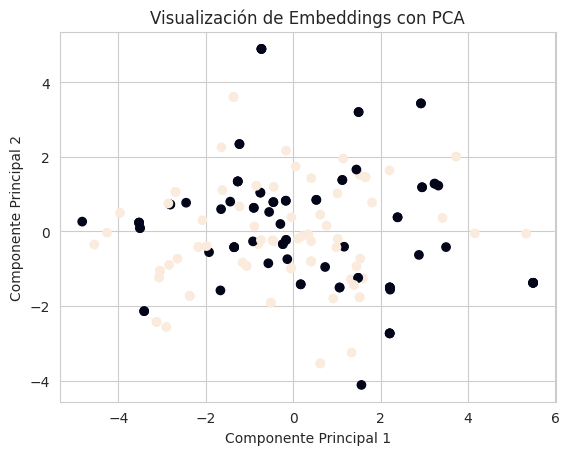

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir la dimensionalidad de los embeddings usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Graficar los embeddings proyectados y colorear según la clase predicha
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_rf.predict(X))
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Embeddings con PCA')
plt.show()

In [ ]:
# Obtener la importancia de características para la Prueba 1
importances_prueba1 = best_rf.feature_importances_ * embeddings_prueba1.flatten() # Flatten the embeddings array

# Ordenar las características por importancia
indices_importantes = np.argsort(importances_prueba1)[::-1]

# Imprimir las características más importantes y sus valores
print("Características más importantes para la Prueba 1:")
for i in indices_importantes[:5]:  # Mostrar las 5 características más importantes
    print(f"Característica {i}: Importancia = {importances_prueba1[i]}")

Características más importantes para la Prueba 1:
Característica 656: Importancia = 0.010909462428768446
Característica 591: Importancia = 0.00685585768134701
Característica 437: Importancia = 0.005158485724654328
Característica 261: Importancia = 0.0027609740860506248
Característica 217: Importancia = 0.0025629514411859558


Características más importantes para la Prueba 1:
Característica 656: Importancia = 0.010909462428768446
Característica 591: Importancia = 0.00685585768134701
Característica 437: Importancia = 0.005158485724654328
Característica 261: Importancia = 0.0027609740860506248
Característica 217: Importancia = 0.0025629514411859558


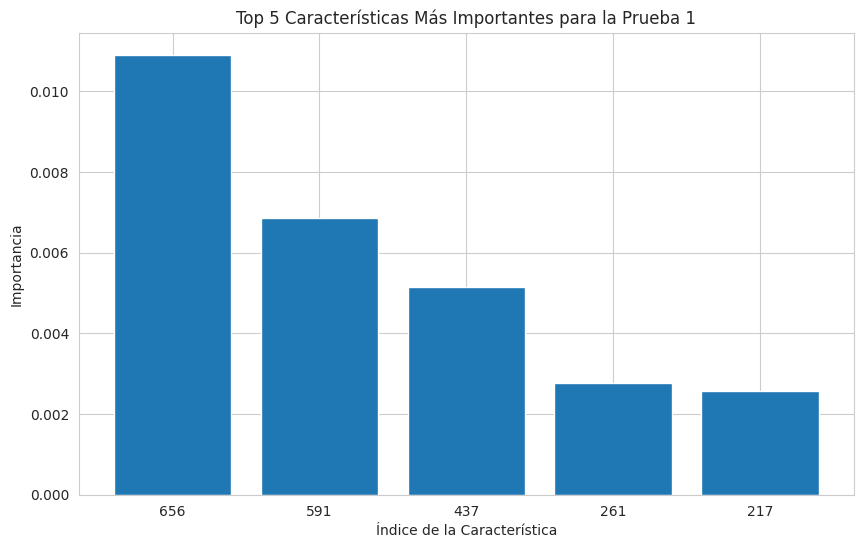

In [ ]:
# Imprimir las características más importantes y sus valores
print("Características más importantes para la Prueba 1:")
top_indices = indices_importantes[:5]  # Store the top 5 indices
top_importances = importances_prueba1[top_indices]
for i, importance in zip(top_indices, top_importances):  # Mostrar las 5 características más importantes
    print(f"Característica {i}: Importancia = {importance}")

# Visualizar las importancias
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_importances)), top_importances)
plt.xticks(range(len(top_importances)), top_indices)
plt.xlabel('Índice de la Característica')
plt.ylabel('Importancia')
plt.title('Top 5 Características Más Importantes para la Prueba 1')
plt.show()

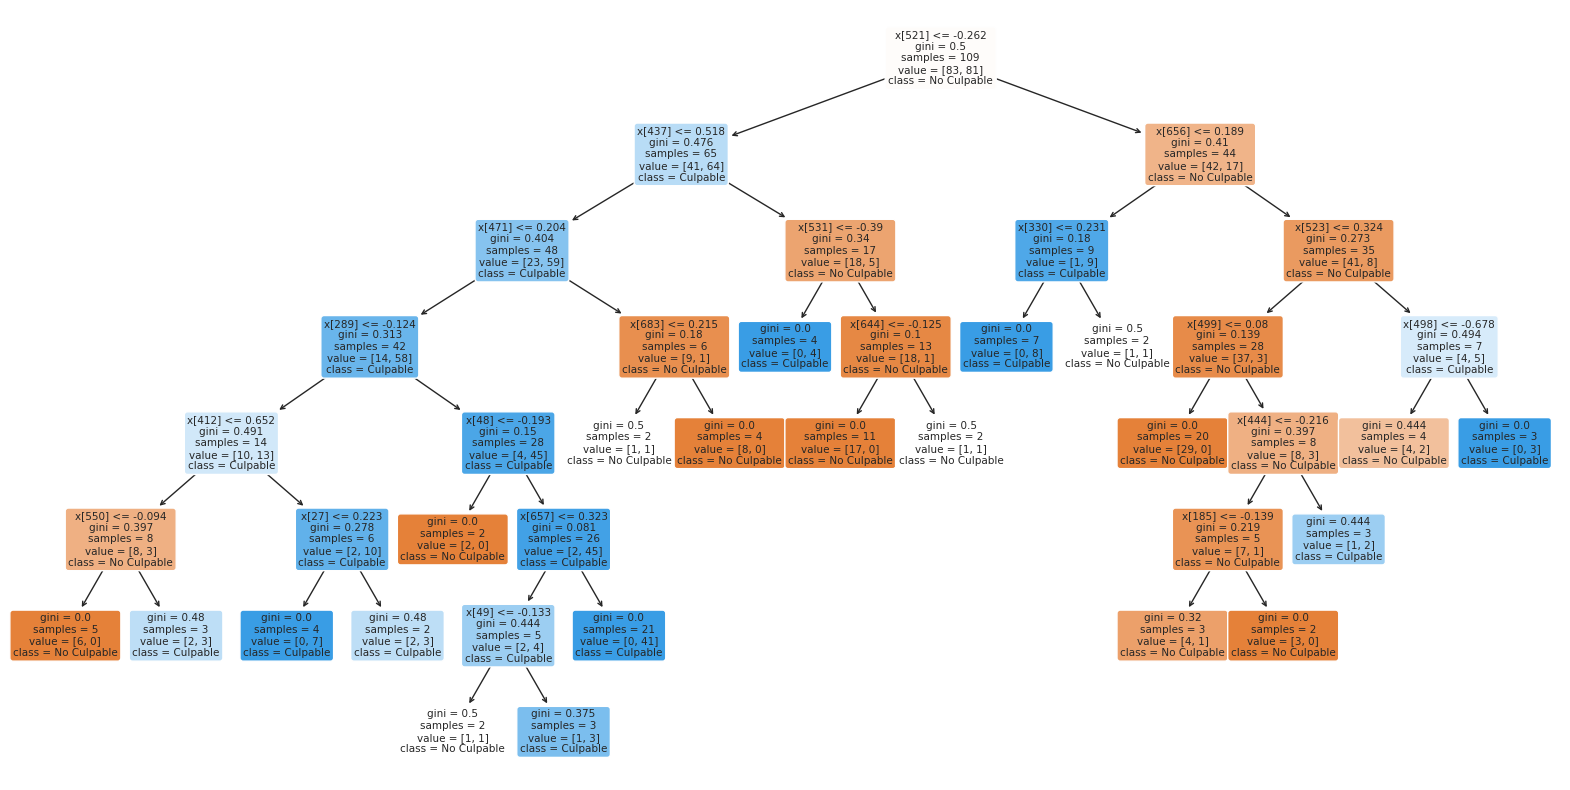

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Asumiendo que 'best_rf' es tu modelo RandomForest entrenado
# Selecciona un árbol del bosque (por ejemplo, el primero)
arbol = best_rf.estimators_[0]

# Visualiza el árbol
plt.figure(figsize=(20,10))  # Ajusta el tamaño de la figura según sea necesario
tree.plot_tree(arbol,
               feature_names=None,  # Reemplaza con los nombres de tus características si las tienes
               class_names=["No Culpable", "Culpable"],  # Reemplaza con los nombres de tus clases
               filled=True,
               rounded=True)
plt.show()